/mnt/data2/home/leonardo/miniconda3/envs/velovi/lib/python3.12/site-packages/velovi/__init__.py:7: UserWarning: The velovi package is no longer being actively developed or maintained as of v0.4.0. Please use the implementation in the scvi-tools package instead. For more information, see https://github.com/scverse/scvi-tools/issues/2610.
  warnings.warn(
/mnt/data2/home/leonardo/miniconda3/envs/velovi/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


INFO     File                                                                                                      
         /mnt/data2/home/leonardo/git/multilineage_velocity/benchmark/velovi/forebrain/velovi_forebrain/model.pt   
         already downloaded                                                                                        
computing velocity graph (using 1/24 cores)
or disable the progress bar using `show_progress_bar=False`.
    finished (0:00:02) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


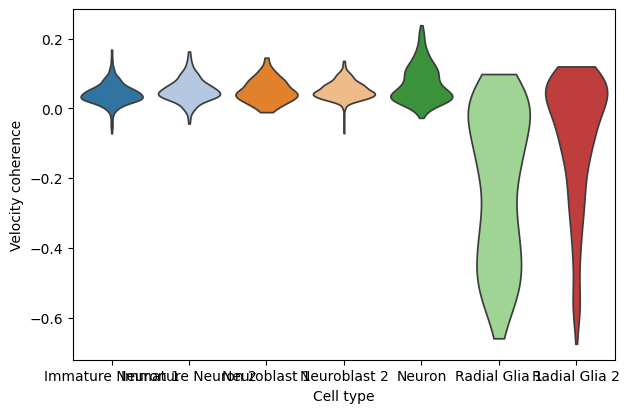

computing velocity graph (using 1/24 cores)
    finished (0:00:01) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


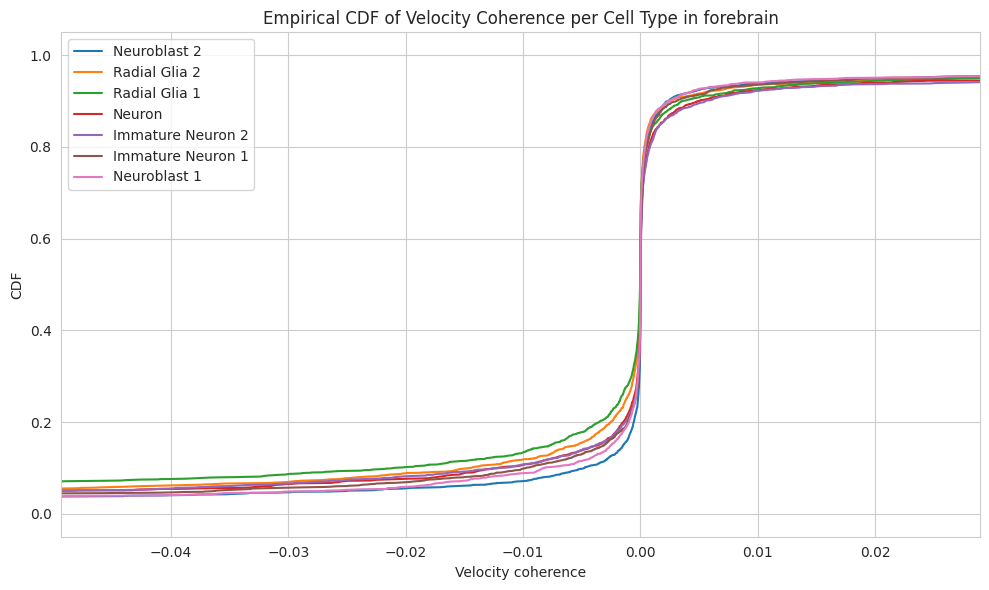

In [1]:
import scanpy as sc
from velovi import VELOVI
from velovi_adapted_metrics import *

# Load the data
adata_path = "/mnt/data2/home/leonardo/git/multilineage_velocity/benchmark/velovi/forebrain/velovi_forebrain.h5ad"
adata = sc.read_h5ad(adata_path)

# Initialize the VELOVI model with the anndata object
VELOVI.setup_anndata(adata, spliced_layer="Ms", unspliced_layer="Mu")
model = VELOVI(adata)

# Load the pretrained model using the VELOVI-specific method
model_path = "/mnt/data2/home/leonardo/git/multilineage_velocity/benchmark/velovi/forebrain/velovi_forebrain"
model = VELOVI.load(model_path, adata=adata)

# Set up the dataloader with the anndata object, batch size, and no data splitting
from dataloaders import setup_dataloaders
_, _, dataloader = setup_dataloaders(adata, batch_size=256, train_size=1, split_data=False)

# Compute and plot velocity coherence
# The adjusted function requires the VELOVI model and dataloader.
plot_velocity_coherence(adata, "forebrain", "Clusters")

plot_velocity_coherence_cdf(adata, "forebrain", "Clusters")